EDA & Data Preparation

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [304]:
data_file_path = '/Users/Faisal/Development/MLData/weather_history.csv'
data = pd.read_csv(data_file_path)

In [305]:
# checking the head of the dataset
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [306]:
# checking the shape of the dataset
data.shape

(96453, 12)

In [307]:
# Checking information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [308]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Remove unwanted columns

In [309]:
data['Loud Cover'].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

In [310]:
# all the rows of Loud Cover column have zero value, so we will remove it
data.drop('Loud Cover', axis=1, inplace=True)

# removed Formatted Date, Daily Summary as they are not necessary
data.drop(['Formatted Date', 'Daily Summary'], axis=1, inplace=True)


data

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [311]:
# check if there is any null value in the dataset
data.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [312]:
data['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [313]:
# Fill missing Precip Type values with rain
data['Precip Type'].fillna(method='ffill', inplace=True, axis=0)
data['Precip Type'].value_counts()

rain    85741
snow    10712
Name: Precip Type, dtype: int64

We are selecting following Features:
[Precip Type,
Temperature (C),
Apparent Temperature (C),
Humidity,
Wind Speed (km/h),
Wind Bearing (degrees),
Visibility (km),
Pressure (millibars)]

We want to Predict: Summary

In [314]:
# converting categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Precip Type'] = label_encoder.fit_transform(data['Precip Type'])
data['Summary'] = label_encoder.fit_transform(data['Summary'])
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


Box Plot

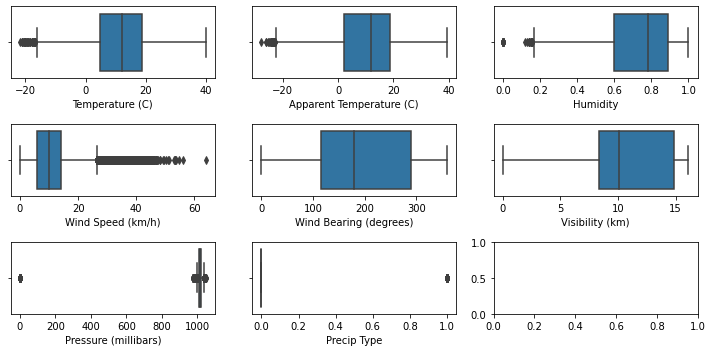

In [315]:
# creating plot layout
fig, axs = plt.subplots(3, 3, figsize=(10, 5))

# creating actual box plot
sns.boxplot(data['Temperature (C)'], ax = axs[0,0])
sns.boxplot(data['Apparent Temperature (C)'], ax = axs[0,1])
sns.boxplot(data['Humidity'], ax = axs[0,2])
sns.boxplot(data['Wind Speed (km/h)'], ax = axs[1,0])
sns.boxplot(data['Wind Bearing (degrees)'], ax = axs[1,1])
sns.boxplot(data['Visibility (km)'], ax = axs[1,2])
sns.boxplot(data['Pressure (millibars)'], ax = axs[2,0])
sns.boxplot(data['Precip Type'], ax = axs[2,1])
plt.tight_layout()